# CLASSIFICATION PROJECT - TO PREDICT CUSTOMER CHURN
Classification in machine learning and statistics is a supervised learning approach where the algorithm learns from provided data to make predictions or classifications. The primary objective is to determine the class or category to which new data belongs.

## 1. Business Understanding 
Focuses on understanding the objectives and requirements of the project.

### PROJECT TITLE
CHURN PREDICTION AND ANALYSIS : Leveraging Machine Learning for Customer Retention

### Objective of Project 
The team aims to analyze the various factors influencing client churn and predict future churn probability using machine learning techniques.

### Goal of Project
To develop predictive models that forecast the likelihood of individual customers churning in the future, enabling proactive intervention strategies to retain at-risk customers and maximize customer retention.

## 2. Data Understanding
Drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals.

### Data Sources
The datasets were extracted from three(3) locations:
- The first dataset - 3000 records of the dataset was extracted from Microsoft SQL Server
- The second dataset - 2000 records of the dataset was downloaded from a Github repository
- The third dataset - the test dataset was downloaded from a OneDrive account

The columns in the first two datasets include :

1. Customer_ID
2. Gender
3. Senior_Citizen
4. Partner
5. Dependents
6. Tenure_Months
7. Phone_Service
8. Multiple_Lines
9. Internet_Service
10. Online_Security
11. Online_Backup
12. Device_Protection
13. Tech_Support
14. Streaming_TV
15. Streaming_Movies
16. Contract
17. Paperless_Billing
18. Payment_Method
19. Monthly_Charges
20. Total_Charges
21. Churn

### Hypothesis
H0: Payment methods does not significantly influence customer churn 

H1: Payment methods significantly influence customer churn

### Business Questions

1.	Is there a relationship between Demographic Factors and Churn rate?
How does gender, senior citizenship, and partnership status relate to churn rates? Are there any significant differences in churn between different demographic groups?

2.	Does the type of Internet service relate to the probability of a customer churn?
Which type of internet service recorded the highest customer churn rate?

3.	Does the Tenure type have a relationship with customer Churn?
Is there a correlation between the tenure of a customer and the likelihood of churn? Do longer-tenured customers exhibit different churn behavior compared to newer ones?

4.	Does the Contract Type have a correlation with the customer churn? 
How does the type of contract (month-to-month, one-year, two-year) influence churn rates? Are customers on longer-term contracts less likely to churn?

5.	Payment Method and Churn:
 Does the chosen payment method impact churn behavior? Are customers using certain payment methods more likely to churn than others?

## 3. Data Preparation
Prepares the final datasets for Modeling.

In [5]:
# Import Libraries to use
# !pip install --upgrade pip
# !pip install scipy
# !pip install scikit-learn
# !pip install imbalanced-learn



import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

import pickle
import joblib
import os
import subprocess


In [6]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'
table_name = 'dbo.LP2_Telco_churn_first_3000'

# Connection string
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
conn = pyodbc.connect(conn_str)

# Query the database and load data into a DataFrame
query = "SELECT * FROM LP2_Telco_churn_first_3000"
data1 = pd.read_sql(query, conn)

data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
# saving data1 as csv file
# data1 = pd.DataFrame(data1)

# Save DataFrame to CSV
# data1.to_csv('Datasets 1.csv', index=False)

In [8]:
# Read the saved Dataset 1.csv
#data1=pd.read_csv(r"C:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Git Assignment\LP2 Repo\CUSTOMER-CHURN-ANALYSIS\Notebooks\Datasets 1.csv")
# data1.head()

In [9]:

# Raw URL of the dataset file
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'

# Read the dataset into a DataFrame
data2= pd.read_csv(url)

data2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [10]:
# saving data2 as csv file
# data2 = pd.DataFrame(data2)

# Save DataFrame to CSV
# data2.to_csv('Datasets 2.csv', index=False)

In [11]:
# Read the saved Dataset 2.csv
# data2=pd.read_csv(r"C:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Git Assignment\LP2 Repo\CUSTOMER-CHURN-ANALYSIS\Notebooks\Datasets 2.csv")
# data2.head()

### Data Info
- In the data Cleaning phase, we check the columns, shape, and information on the data to understand its dimensions.
- We then check for null values in the dataset and impute or remove them depending on the circumstances
- Also we perform a check for duplicate values and replace them to ensure data integrity

#### Data 1

In [12]:
# check column names of data1
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
#Checking the data shape

print(f'The first 3000 dataset contains {data1.shape[0]} rows and {data1.shape[1]} columns')

The first 3000 dataset contains 3000 rows and 21 columns


In [14]:
# view data1
data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:
# Describe data 1
data1.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [16]:
# view data1 info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [17]:
# showing all the null values in the columns of the data from the server. 9 columns have null values in them.

data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Data 2 

In [18]:
#Check the data shape

print(f'The next dataset contains {data2.shape[0]} rows and {data2.shape[1]} columns')

The next dataset contains 2043 rows and 21 columns


In [19]:
#check column names of data2

data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
data2.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [22]:
# showing all the null values in the columns of the data from the github(data2)
# No null values found in data2

data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Compare the two DataFrames data1 and data2 side-by-side
# The idea is to easily compare so we can clean dataset before we merge as a train dataset

# Create custom summary DataFrames for each DataFrame
summary_data1 = pd.DataFrame({'Column Name': data1.columns, 'Data Type': data1.dtypes, 'Non-Null Count': data1.count()})
summary_data2 = pd.DataFrame({'Column Name': data2.columns, 'Data Type': data2.dtypes, 'Non-Null Count': data2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data1.set_index('Column Name', inplace=True)
summary_data2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data1, summary_data2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

From the above the following was observed:

- Both have the same column names
- There are different datatypes in some columns. For instance SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, and TotalCharges
- Data cleaning will be done side by side before merging.

### Data Cleaning

In both Datasets; 

- SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, TotalCharges(5 missing values) all have different datatypes. This has to be changed to the same datatypes. 

- MultipleLines in data1 has 269 missing values and needs to be cleaned.

- OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, TechSupport have 651 missing values in data1

- Churn has 1 missing value in data1.

- CustomerID, gender, Contract, tenure, InternetService, MonthlyCharges, PaymentMethod all had the same datatypes and non-null values. 

#### Clean 'SeniorCitizen' column 
There are no missing data present but the datatype is different. data1 is a boolean while data2 is made up of integers

In [24]:
# check unique values in data1

data1['SeniorCitizen'].unique()

array([False,  True])

In [25]:
# check unique values in data2

data2['SeniorCitizen'].unique()

array([0, 1])

In [26]:
# Convert the binary column to boolean datatype

data2['SeniorCitizen'] = data2['SeniorCitizen'].astype(bool)

In [27]:
# check unique values in data2

data2['SeniorCitizen'].unique()

array([False,  True])

#### Clean 'Partner' column
- Convert data2['Partner'] to boolean datatype to reflect Data understanding documentation
- Whether the customer has a partner or not (Yes, No)

In [28]:
# preview first 5 data in 'partner' column in data1

data1['Partner'].head()

0     True
1    False
2    False
3    False
4    False
Name: Partner, dtype: bool

In [29]:
#  check unique data in partner column in data1

data1['Partner'].unique()

array([ True, False])

In [30]:
# preview first 5 data in 'partner' column in data2

data2['Partner'].head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Partner, dtype: object

In [31]:
#  check unique data in partner column in data2

data2['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#Replace 'Yes' or 'No' with True or False in data2

data2['Partner'].replace('Yes', True, inplace=True)
data2['Partner'].replace('No', False, inplace=True)

data2['Partner'].head()

0    False
1    False
2     True
3     True
4     True
Name: Partner, dtype: bool

#### Clean 'Dependents' column
- Convert data2['Dependents'] to boolean

In [33]:
data1['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [34]:
data1['Dependents'].unique()

array([False,  True])

In [35]:
# # preview first 5 data in 'Dependents' column in data2
data2['Dependents'].head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Dependents, dtype: object

In [36]:
# Replace 'Yes' or 'No' with True or False to change datatype to boolean

data2['Dependents'].replace('Yes', True, inplace=True)
data2['Dependents'].replace('No', False, inplace=True)

data2['Dependents'].head()

0    False
1    False
2     True
3     True
4    False
Name: Dependents, dtype: bool

#### Clean 'Tenure' column

In [37]:
#check unique data in tenure column in data1

data1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [38]:
#check unique data in tenure column in data2

data2['tenure'].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63])

In [39]:
# check for null values in tenure in column

data1['tenure'].isnull().sum()

np.int64(0)

In [40]:
# check for null values in tenure in column

data2['tenure'].isnull().sum()

np.int64(0)

#### Clean 'PhoneService' column
- Convert data2 ['PhoneService'] to boolean.

In [41]:
# preview first 5 data in PhoneService column

data2['PhoneService'].head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: PhoneService, dtype: object

In [42]:
#Replace 'Yes' or 'No' with True or False

data2['PhoneService'].replace('Yes', True, inplace=True)
data2['PhoneService'].replace('No', False, inplace=True)

data2['PhoneService'].head()

0     True
1     True
2    False
3     True
4     True
Name: PhoneService, dtype: bool

In [43]:
# preview first 5 data in PhoneService column

data1['PhoneService'].head()

0    False
1     True
2     True
3    False
4     True
Name: PhoneService, dtype: bool

#### Clean 'MultipleLines' column
data1 has 269 missing values, impute with mode

In [44]:
#confirm number of missing values

data1['MultipleLines'].isnull().sum()

np.int64(269)

In [45]:
#Check unique values in MultipleLines

data1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [46]:
#Count unique values

data1['MultipleLines'].value_counts()

MultipleLines
False    1437
True     1294
Name: count, dtype: int64

In [47]:
#impute missing values with mode
mode_multiplelines = data1['MultipleLines'].mode()[0]

data1['MultipleLines'].fillna(mode_multiplelines, inplace=True)
data1['MultipleLines'].isnull().sum()

np.int64(0)

In [48]:
data1['MultipleLines'].value_counts()

MultipleLines
False    1706
True     1294
Name: count, dtype: int64

In [49]:
# confirm unique values in data1
data1['MultipleLines'].unique()

array([False,  True])

In [50]:
data2['MultipleLines'].head(8)

0                  No
1                  No
2    No phone service
3                 Yes
4                 Yes
5                  No
6                 Yes
7                  No
Name: MultipleLines, dtype: object

In [51]:
# checking the count of the unique values MultipleLines in data2

data2['MultipleLines'].value_counts()

MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64

In [52]:
# we assume that an answer of 'No phone service' is the same as No, since a customer without phone service will have no need for multiplelines

# Replace 'No phone service' with 'No' in the 'MultipleLines' column
data2['MultipleLines'].replace('No phone service', 'No', inplace=True)
data2['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [53]:
#confirm number of missing values

data2['MultipleLines'].isnull().sum()

np.int64(0)

In [54]:
# convert datatype to boolean in data2

data2['MultipleLines'].replace('Yes', True, inplace=True)
data2['MultipleLines'].replace('No', False, inplace=True)
data2['MultipleLines'].head()

0    False
1    False
2    False
3     True
4     True
Name: MultipleLines, dtype: bool

In [55]:
# confirm unique values forMultipleLines in data2

data2['MultipleLines'].unique()

array([False,  True])

#### Clean 'InternetService' column
- This Column is Clean

In [56]:
data1['InternetService'].isnull().sum()

np.int64(0)

In [57]:
data1['InternetService'].nunique()

3

In [58]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [59]:
data2['InternetService'].nunique()

3

In [60]:
data2['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

#### Clean 'OnlineSecurity' column
 OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

In [61]:
# checking for unique values in data1 
data1['OnlineSecurity'].unique()

array([False, True, None], dtype=object)

In [62]:
# value count of OnlineSecurity
data1['OnlineSecurity'].value_counts()

OnlineSecurity
False    1478
True      871
Name: count, dtype: int64

In [63]:
# checking for missing values in  data1 
data1['OnlineSecurity'].isnull().sum()

np.int64(651)

In [64]:
# we assume the missing data is a response to the third option 'No Internet'. Hence will fill missing with 'No Internet'
# Impute missing values with 'No Internet'.


data1['OnlineSecurity'].fillna('No Internet', inplace=True)
data1['OnlineSecurity'].value_counts()

OnlineSecurity
False          1478
True            871
No Internet     651
Name: count, dtype: int64

In [65]:
# checking for data2 unique values
data2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [66]:
data2['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [67]:
# Replace 'No internet service' with 'No Internet' in the 'OnlineSecurity' column in data2

data2['OnlineSecurity'].replace('No internet service', 'No Internet', inplace=True)
data2['OnlineSecurity'].value_counts()

OnlineSecurity
No             1029
Yes             585
No Internet     429
Name: count, dtype: int64

#### Clean 'OnlineBackup' column
- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
- OnlineBackup has 651 missing values in data1


In [68]:
data1['OnlineBackup'].isnull().sum()

np.int64(651)

In [69]:
# checking unique values for data1['OnlineBackup']
data1['OnlineBackup'].unique()

array([True, False, None], dtype=object)

In [70]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'OnlineBackup' column
# Fill missing values with 'No Internet'

data1['OnlineBackup'].replace(True, 'Yes', inplace=True)
data1['OnlineBackup'].replace(False, 'No', inplace=True)

data1['OnlineBackup'].fillna('No Internet', inplace=True)
data1['OnlineBackup'].value_counts()

OnlineBackup
No             1320
Yes            1029
No Internet     651
Name: count, dtype: int64

In [71]:
# checking unique values for data2['OnlineBackup']
data2['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [72]:
# Replace 'No internet service' with 'No Internet'

# data2['OnlineBackup'].replace('No internet service', 'No Internet', inplace=True)
data2['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Clean 'DeviceProtection' column
- DeviceProtection has 651 missing values in data1
- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

In [73]:
data1['DeviceProtection'].unique()

array([False, True, None], dtype=object)

In [74]:
data1['DeviceProtection'].isnull().sum()

np.int64(651)

In [75]:
# Replace 'False' with 'No' and 'True' with 'Yes' in the 'DeviceProtection' column for data1 
# Fill missing values with 'No Internet'

data1['DeviceProtection'].replace(True, 'Yes', inplace=True)
data1['DeviceProtection'].replace(False, 'No', inplace=True)

data1['DeviceProtection'].fillna('No internet service', inplace=True)
data1['DeviceProtection'].value_counts()

DeviceProtection
No                     1296
Yes                    1053
No internet service     651
Name: count, dtype: int64

In [76]:
data2['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Clean 'TechSupport' column 
- TechSupport has 651 missing values in data1
- Whether the customer has tech support or not (Yes, No, No internet)

In [77]:
# checking for unique values in data1['TechSupport']
data1['TechSupport'].unique()

array([False, True, None], dtype=object)

In [78]:
data1['TechSupport'].value_counts()

TechSupport
False    1476
True      873
Name: count, dtype: int64

In [79]:
# Replace 'False' with 'No' and 'True' with 'Yes' in the 'TechSupport' column for data1 
# Fill missing values with 'No Internet'

data1['TechSupport'].replace(True, 'Yes', inplace=True)
data1['TechSupport'].replace(False, 'No', inplace=True)

data1['TechSupport'].fillna('No internet', inplace=True)
data1['TechSupport'].value_counts()

TechSupport
No             1476
Yes             873
No internet     651
Name: count, dtype: int64

In [80]:
# confirming null vlaues
data1['TechSupport'].isnull().sum()

np.int64(0)

In [81]:
# checking unique values in data2['TechSupport']
data2['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [82]:
# Replace 'No internet service' with 'No internet' in the 'TechSupport' column for data2

data2['TechSupport'].replace('No internet service', 'No internet', inplace=True)
data2['TechSupport'].unique()

array(['Yes', 'No', 'No internet'], dtype=object)

#### Clean 'StreamingTV' column
Whether the customer has streaming TV or not (Yes, No, No internet service)

In [83]:
data1['StreamingTV'].unique()

array([False, True, None], dtype=object)

In [84]:
# replace True and False with Yes and No respectively
# Fill null values with no internet service

data1['StreamingTV'].replace(True, 'Yes', inplace=True)
data1['StreamingTV'].replace(False, 'No', inplace=True)

data1['StreamingTV'].fillna('No internet service', inplace=True)
data1['StreamingTV'].value_counts()

StreamingTV
No                     1190
Yes                    1159
No internet service     651
Name: count, dtype: int64

In [85]:
data2['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Clean 'StreamingMovies' column
Whether the customer has streaming movies or not (Yes, No, No Internet service)

In [86]:
data1['StreamingMovies'].unique()

array([False, True, None], dtype=object)

In [87]:
data1['StreamingMovies'].replace(True, 'Yes', inplace=True)
data1['StreamingMovies'].replace(False, 'No', inplace=True)

data1['StreamingMovies'].fillna('No internet service', inplace=True)
data1['StreamingMovies'].value_counts()

StreamingMovies
Yes                    1199
No                     1150
No internet service     651
Name: count, dtype: int64

In [88]:
data1['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
data2['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Clean 'Contract' Column
This column is clean

In [90]:
data1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [91]:
data2['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

#### Clean 'PaperlessBilling' column
- In data1 PaperlessBilling has boolean as its datatype and object as its datatype in data2 
- Whether the customer has paperless billing or not (Yes, No). So datatypes should aall be in objects (Yes, No)
- No missing values detected 

In [92]:
data1['PaperlessBilling'].unique()

array([ True, False])

In [93]:
# Replace 'False' with 'No' and 'True' with 'Yes' in the 'PaperlessBilling' column for data1 


data1['PaperlessBilling'].replace(True, 'Yes', inplace=True)
data1['PaperlessBilling'].replace(False, 'No', inplace=True)
data1['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
# checking uique values in  data2['PaperlessBilling']
data2['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

#### Clean 'PaymentMethod' column
No cleaning needed because the 'PaymentMethod' columns in the datasets had similar attributes. No misssing values to fill


In [95]:
data1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [96]:
data2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

#### Clean 'MonthlyCharges' column
- Converting the float to 2 d.p needed in data1. No misssing values to fill


In [97]:
# checking d.p in data1 values
data1['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [98]:
#convert to 2 d.p

data1['MonthlyCharges'] = data1['MonthlyCharges'].round(2)
data1['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [99]:
# checking data2 to see the d.p values 
data2['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

#### Clean 'TotalCharges' column
- TotalCharges has 5 missing values in data1 and datatypes are different

In [100]:
# preview TotalCharges from data1 
data1['TotalCharges'].head()

0      29.850000
1    1889.500000
2     108.150002
3    1840.750000
4     151.649994
Name: TotalCharges, dtype: float64

In [101]:
#convert to 2 d.p
data1['TotalCharges'] = data1['TotalCharges'].round(2)
data1['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [102]:
# check for null values
data1['TotalCharges'].isnull().sum()

np.int64(5)

In [103]:
# Drop rows with any missing values in the TotalCharges column in data1
#  and confirm null values available 
data1.dropna(subset='TotalCharges', inplace=True)
data1['TotalCharges'].isnull().sum()

np.int64(0)

In [104]:
# preview TotalCharges in data2
data2['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: object

In [105]:
# Convert the TotalCharges column in data2 to float datatype
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 d.p 
data2['TotalCharges'] = data2['TotalCharges'].round(2)
data2['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

In [106]:
data2['TotalCharges'].isnull().sum()

np.int64(3)

In [107]:
# Drop rows with any missing values in the TotalCharges column in data2
# and confirm null values available
data2.dropna(subset='TotalCharges', inplace=True)
data2['TotalCharges'].isnull().sum()

np.int64(0)

#### Clean 'Churn' column 
Churn has 1 missing value in data1.
Missing value will be dropped

In [108]:
data1['Churn'].isnull().sum()

np.int64(1)

In [109]:
data1['Churn'].unique()

array([False, True, None], dtype=object)

In [110]:
# Drop row with the missing value in the Churn column in data1
data1.dropna(subset='Churn', inplace=True)
data1['Churn'].isnull().sum()

np.int64(0)

In [111]:
data1['Churn'].unique()

array([False, True], dtype=object)

In [112]:
# replace 'True' with 'Yes' and 'False' with 'No'

data1['Churn'].replace(True, 'Yes', inplace=True)
data1['Churn'].replace(False, 'No', inplace=True)
data1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
# cross check Churn column in data2
data2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Check Data After Cleaning Data

In [114]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   bool   
 4   Dependents        2994 non-null   bool   
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   bool   
 7   MultipleLines     2994 non-null   bool   
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   object 
 17  

In [115]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2040 non-null   object 
 1   gender            2040 non-null   object 
 2   SeniorCitizen     2040 non-null   bool   
 3   Partner           2040 non-null   bool   
 4   Dependents        2040 non-null   bool   
 5   tenure            2040 non-null   int64  
 6   PhoneService      2040 non-null   bool   
 7   MultipleLines     2040 non-null   bool   
 8   InternetService   2040 non-null   object 
 9   OnlineSecurity    2040 non-null   object 
 10  OnlineBackup      2040 non-null   object 
 11  DeviceProtection  2040 non-null   object 
 12  TechSupport       2040 non-null   object 
 13  StreamingTV       2040 non-null   object 
 14  StreamingMovies   2040 non-null   object 
 15  Contract          2040 non-null   object 
 16  PaperlessBilling  2040 non-null   object 
 17  

#### Concatenate Datasets

In [116]:
#concatenating the datasets into a single dataframe
main_df = pd.concat([data1,data2],ignore_index=True)
main_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [117]:

main_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5034,5034,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5034,2,Male,2554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5034,2,False,4215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5034,2,False,2583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5034,2,False,3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5034.0,NaN,NaN,NaN,32.62058,24.511015,1.0,9.0,29.0,56.0,72.0
PhoneService,5034,2,True,4547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5034,2,False,2908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5034,3,Fiber optic,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5034,5,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
main_df.shape

(5034, 21)

In [119]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   bool   
 4   Dependents        5034 non-null   bool   
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   bool   
 7   MultipleLines     5034 non-null   bool   
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 


In [120]:
# Original column names
original_column_names = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

# New column names
new_column_names = [
    'Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
    'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
    'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
    'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
    'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'
]


# Rename columns
main_df.columns = new_column_names

# Display the DataFrame with renamed columns
main_df


,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,6840-RESVB,Male,False,True,True,24,True,True,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
5030,2234-XADUH,Female,False,True,True,72,True,True,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
5031,4801-JZAZL,Female,False,True,True,11,False,False,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5032,8361-LTMKD,Male,True,True,False,4,True,True,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [121]:
main_df.duplicated().sum()

np.int64(0)

In [122]:
# check summary statistics on numeric columns

main_df.describe()

,Tenure_Months,Monthly_Charges,Total_Charges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346401
min,1.000000,18.400000,18.800000
25%,9.000000,35.800000,417.662500
50%,29.000000,70.600000,1401.000000
75%,56.000000,90.050000,3860.600000
max,72.000000,118.650000,8670.100000


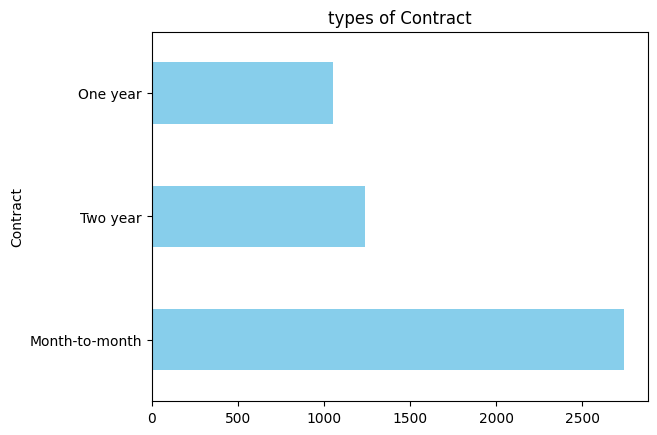

In [123]:
#visualize types of contracts

value_counts = main_df['Contract'].value_counts()

value_counts.plot(kind='barh', color='skyblue')

plt.title('types of Contract')
plt.show()

Tenure_Months


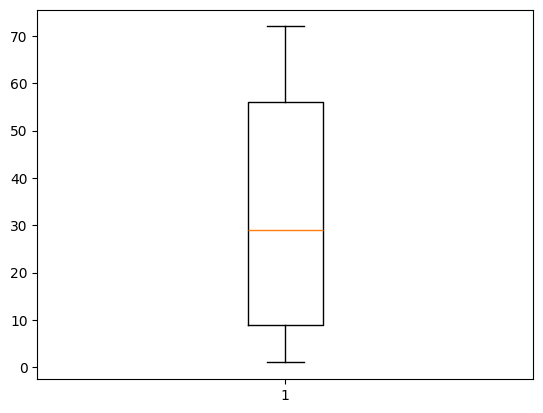

Monthly_Charges


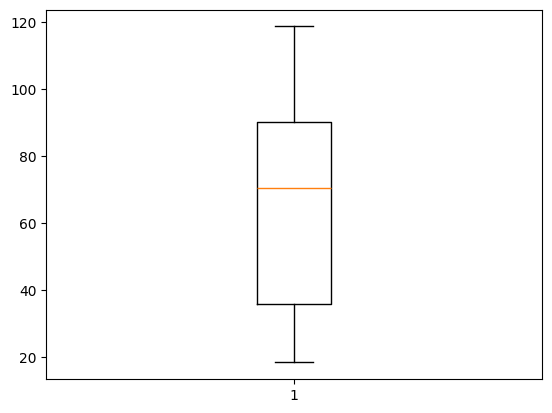

Total_Charges


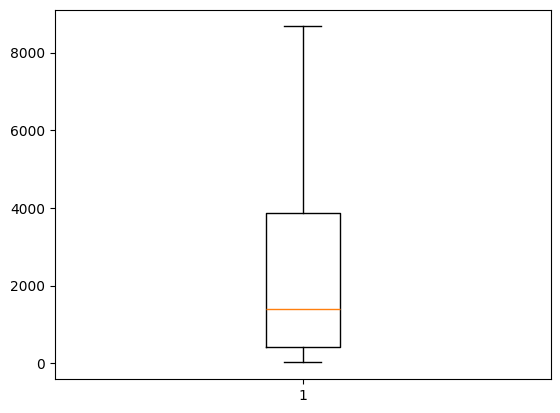

In [124]:
#check integer and float datatype columns for outliers using boxplots


for col in ['Tenure_Months','Monthly_Charges','Total_Charges']:
    print(col)
    plt.boxplot(main_df[col])
    plt.show()

### EXPLORATORY DATA ANALYSIS
- Univariate
- Bivariate
- Multivariate

#### UNIVARIATE ANALYSIS

##### Distribution of Monthly charges

Text(0.5, 1.0, 'Distribution of Monthly Charges')

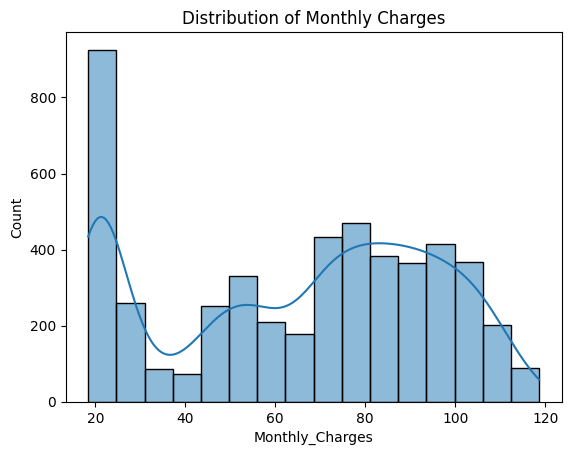

In [125]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=main_df['Monthly_Charges'], kde=True)
plt.title('Distribution of Monthly Charges')

##### Distribution of Total charges

Text(0.5, 1.0, 'Distribution of Total Charges')

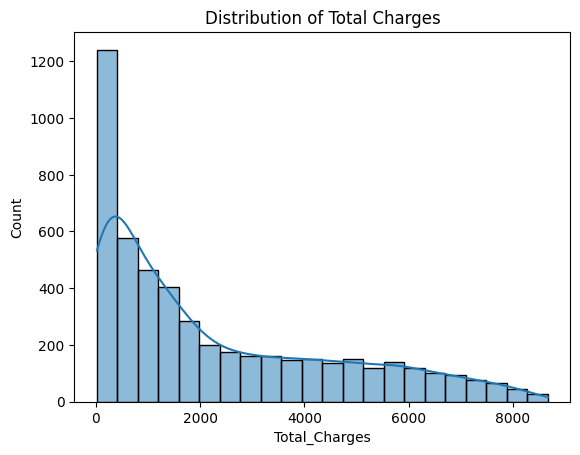

In [126]:
#sns.histplot(data=df['TotalCharges'], kde=True)

# Create the histogram plot using seaborn

sns.histplot(data=main_df['Total_Charges'], kde=True)
plt.title('Distribution of Total Charges')

##### Distribution of Senior Citizen

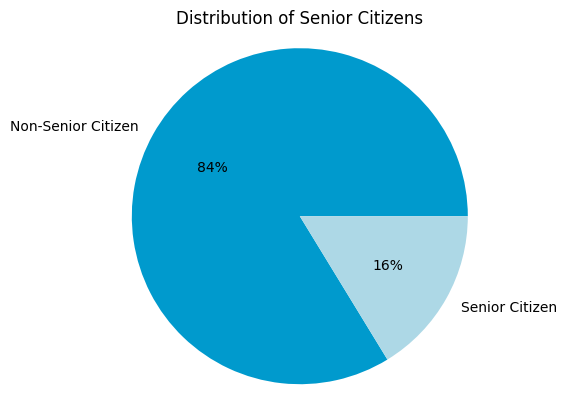

In [127]:
# Count and create pie chart of the 'SeniorCitizen' column

senior_citizen_counts = main_df['Senior_Citizen'].value_counts()
labels = ['Non-Senior Citizen', 'Senior Citizen']

counts = [senior_citizen_counts[0], senior_citizen_counts[1]]
colors = ['#009ACD', '#ADD8E6']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False)
plt.axis('equal')

plt.title('Distribution of Senior Citizens')

plt.show()

##### Distribution of Gender

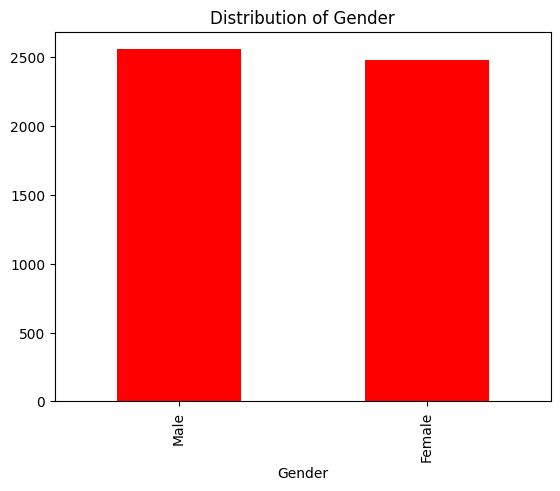

In [128]:
# visualize the 'Gender' column

value_counts = main_df['Gender'].value_counts()

value_counts.plot(kind='bar', color='red')

plt.title('Distribution of Gender')
plt.show()

In [129]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5034 non-null   object 
 1   Gender             5034 non-null   object 
 2   Senior_Citizen     5034 non-null   bool   
 3   Partner            5034 non-null   bool   
 4   Dependents         5034 non-null   bool   
 5   Tenure_Months      5034 non-null   int64  
 6   Phone_Service      5034 non-null   bool   
 7   Multiple_Lines     5034 non-null   bool   
 8   Internet_Service   5034 non-null   object 
 9   Online_Security    5034 non-null   object 
 10  Online_Backup      5034 non-null   object 
 11  Device_Protection  5034 non-null   object 
 12  Tech_Support       5034 non-null   object 
 13  Streaming_TV       5034 non-null   object 
 14  Streaming_Movies   5034 non-null   object 
 15  Contract           5034 non-null   object 
 16  Paperless_Billing  5034 

#### BIVARIATE ANALYSIS


##### Analyze Churn Rate by Payment Method

<Figure size 1500x800 with 0 Axes>

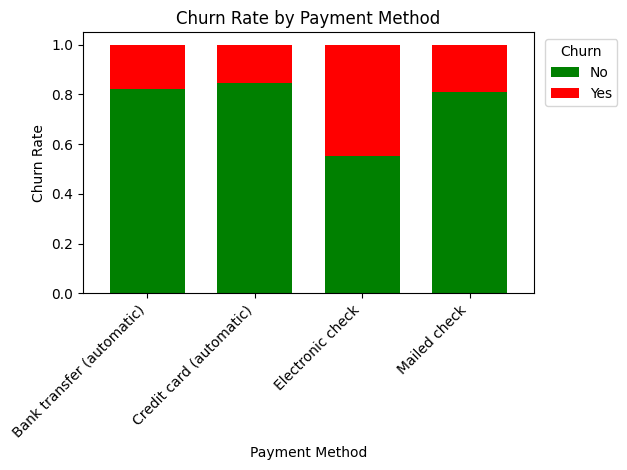

In [130]:
# Calculate churn rates (proportions) for each payment method
churn_counts = main_df.groupby('Payment_Method')['Churn'].value_counts(normalize=True).unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(15, 8))

# Reduce the width between bars
width = 0.7  # (To adjust the width of the bars)
churn_counts.plot(kind='bar', stacked=True, color=['green', 'red'], width=width)

plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')

# Adjust the legend
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()





##### Analyze Internet Service by Churn Rate

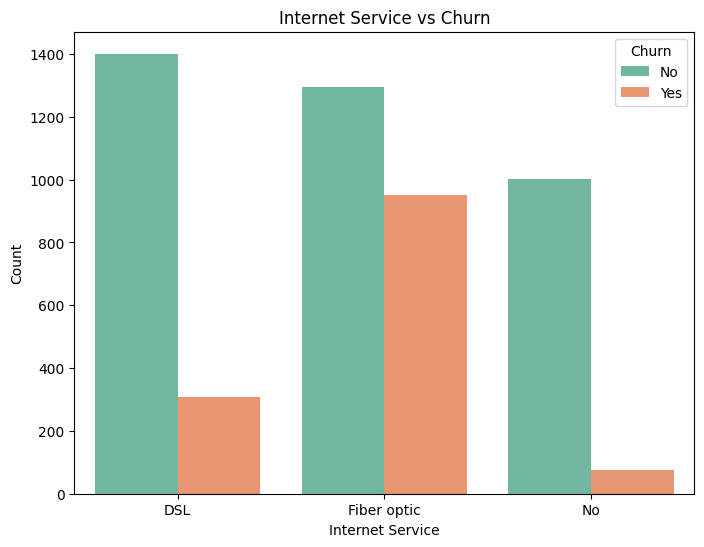

In [131]:
# Bivariate analysis between InternetService and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=main_df, x='Internet_Service', hue='Churn', palette='Set2')
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


##### Analyze Tenure by Churn Rate

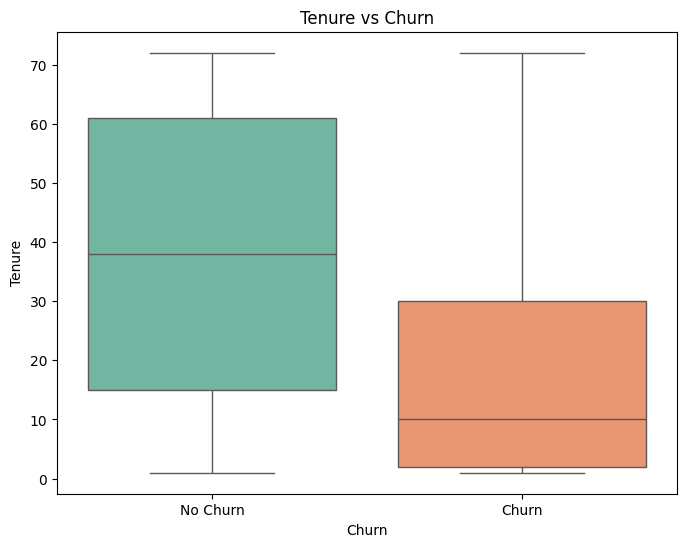

In [132]:
# Plotting box plot for Tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=main_df, x='Churn', y='Tenure_Months', palette='Set2')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


##### Analyze Contract type by Churn rate

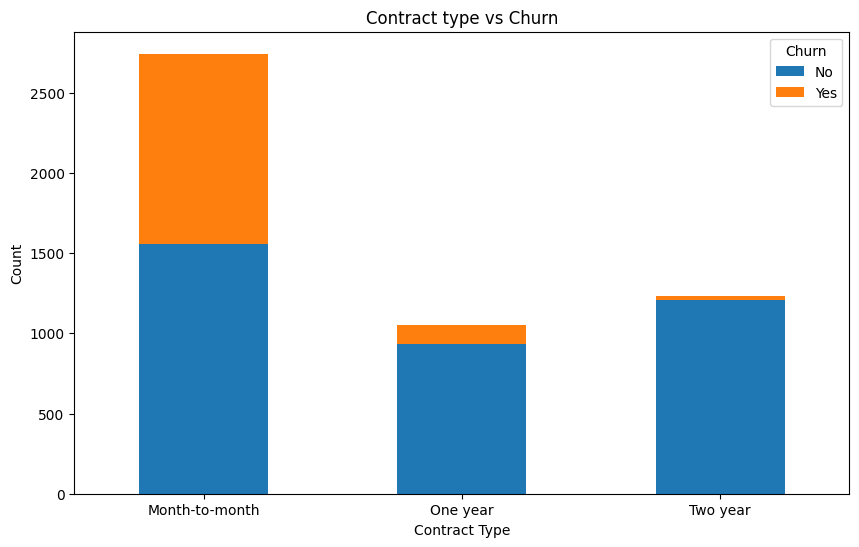

In [133]:
# Create a pivot table to count churned and non-churned customers for each contract type
contract_churn_pivot = pd.pivot_table(main_df, index='Contract', columns='Churn', aggfunc='size', fill_value=0)

# Plotting stacked bar chart
contract_churn_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Contract type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### MULTIVARIATE ANALYSIS

##### Analysis of the variables Partner, Tenure_Months,Monthly_Charges and Churn

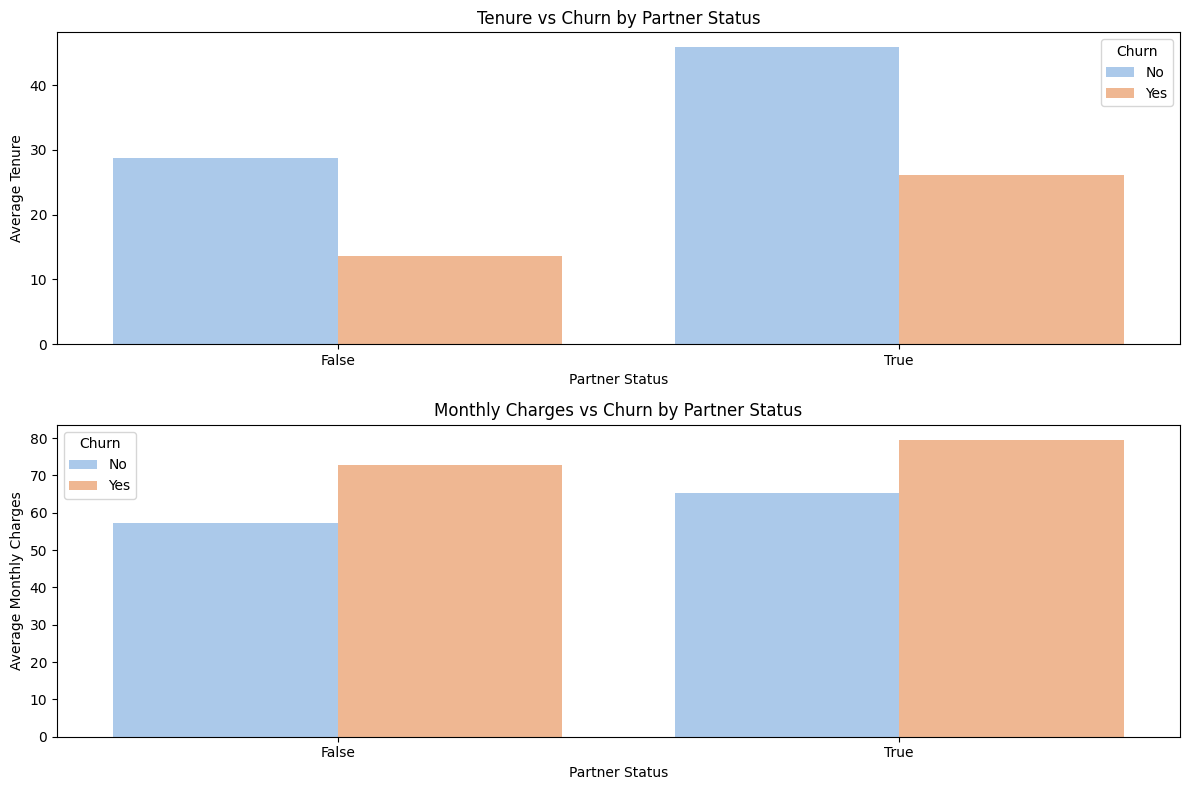

In [134]:
#A multivariate analysis of the variables Partner,Tenure_Months,Monthly_Charges and Churn

multivariate_df = main_df.groupby(['Partner', 'Churn']).agg({'Tenure_Months': 'mean', 'Monthly_Charges': 'mean'}).reset_index()

# Plotting clustered bar chart
plt.figure(figsize=(12, 8))

# Tenure vs Churn
plt.subplot(2, 1, 1)
sns.barplot(data=multivariate_df, x='Partner', y='Tenure_Months', hue='Churn', palette='pastel')
plt.title('Tenure vs Churn by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Average Tenure')

# Monthly Charges vs Churn
plt.subplot(2, 1, 2)
sns.barplot(data=multivariate_df, x='Partner', y='Monthly_Charges', hue='Churn', palette='pastel')
plt.title('Monthly Charges vs Churn by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Average Monthly Charges')

plt.tight_layout()
plt.show()


##### Analysis of demographic factors(Gender,Senior_Citizen,Partnership) and Churn rate

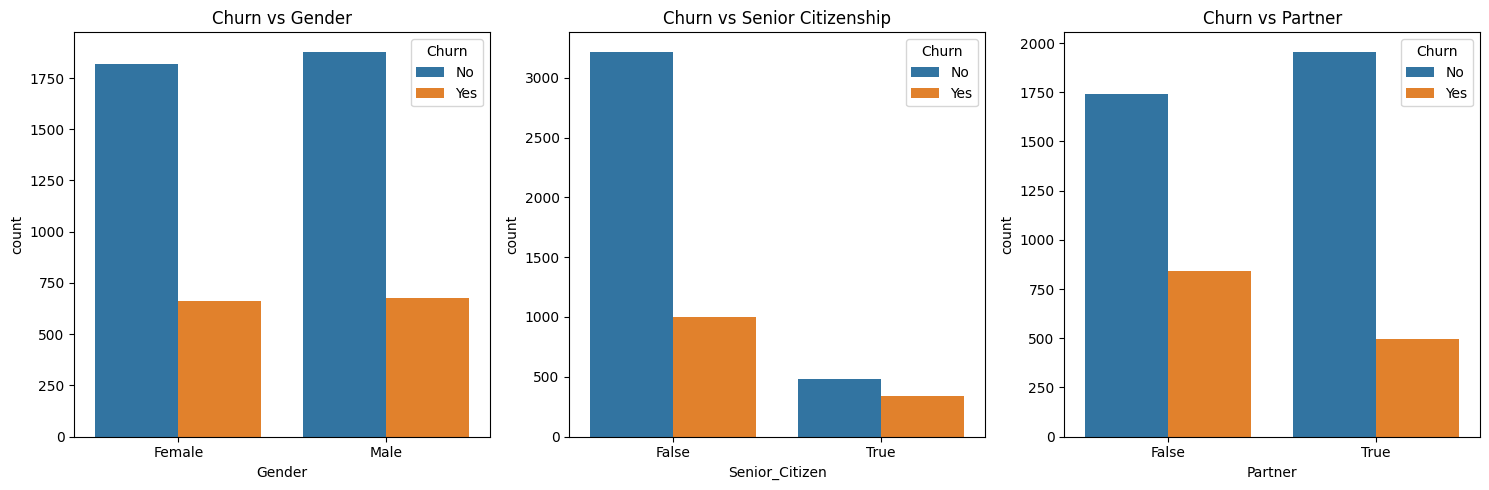

In [135]:
# A multivariate analysis of demographic factors(Gender,Senior_Citizen,Partnership) and Churn rate

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for churn vs gender
sns.countplot(data=main_df, x='Gender', hue='Churn', ax=axes[0])
axes[0].set_title('Churn vs Gender')

# Plot for churn vs senior citizenship
sns.countplot(data=main_df, x='Senior_Citizen', hue='Churn', ax=axes[1])
axes[1].set_title('Churn vs Senior Citizenship')

# Plot for churn vs partner
sns.countplot(data=main_df, x='Partner', hue='Churn', ax=axes[2])
axes[2].set_title('Churn vs Partner')

plt.tight_layout()
plt.show()



##### Analyze type of payment method and Churn Rate

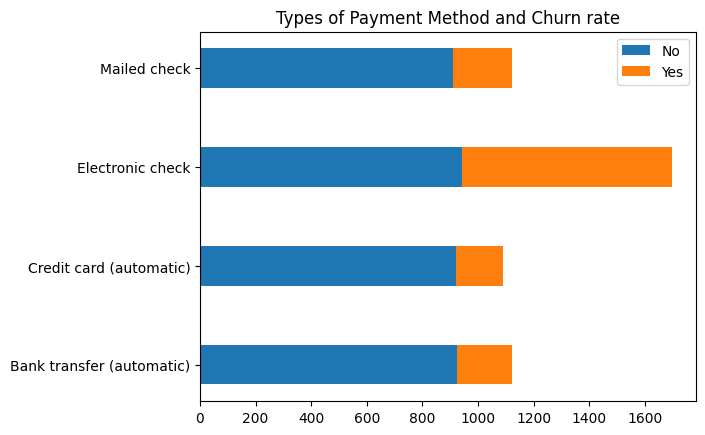

In [136]:
# Grouping and counting occurrences of each combination
grouped_df = main_df.groupby(['Payment_Method', 'Churn']).size().unstack(fill_value=0)

# Plotting the horizontal stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
height = 0.4

bars = []
left = [0] * len(grouped_df)

for paymentmethod in grouped_df.columns:
    bar = ax.barh(index, grouped_df[paymentmethod], height, left=left, label=paymentmethod)
    bars.append(bar)
    left = [left[i] + grouped_df[paymentmethod][i] for i in range(len(grouped_df))]

#ax.set_ylabel('Payment Method')
#ax.set_xlabel('Count')
ax.set_title('Types of Payment Method and Churn rate')
ax.set_yticks(index)
ax.set_yticklabels(grouped_df.index)
ax.legend()

plt.show()


##### Analyze the mean total charges by the Tenure 

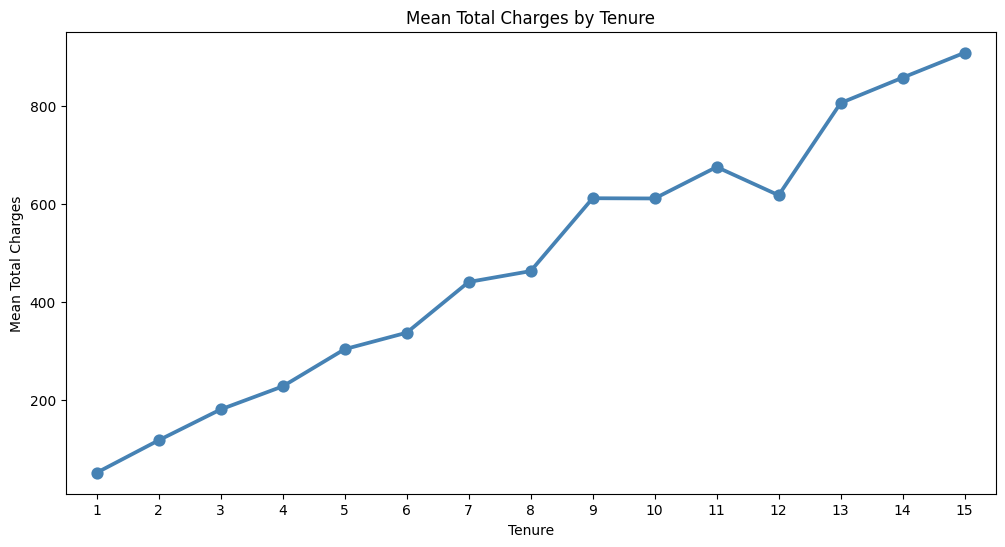

In [137]:
# Grouping by 'tenure' and calculating the mean 'TotalCharges'
df_grp_tenure = main_df.groupby('Tenure_Months')['Total_Charges'].mean().reset_index()

#Top 15 data points
df_grp_tenure_15 = df_grp_tenure.head(15)

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_grp_tenure_15, x='Tenure_Months', y='Total_Charges', color='steelblue')

# Customize the plot
plt
plt.title('Mean Total Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Total Charges')

# Show the plot
plt.show()

### Hypothesis Testing
H0: Payment methods does not significantly influence customer churn 

H1: Payment methods significantly influence customer churn

In [138]:
# Create a contingency table
contingency_table = pd.crosstab(main_df['Payment_Method'], main_df['Churn'])

# Perform the chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 433.2074609759525
P-value: 1.417366538638549e-93
Degrees of Freedom: 3
Expected Frequencies:
[[ 824.96106476  298.03893524]
 [ 799.98450536  289.01549464]
 [1248.09336512  450.90663488]
 [ 824.96106476  298.03893524]]


##### Interpretation of Results

- Chi-Square Statistic: The Chi-Square statistic is 433.207. This value measures the difference between the observed frequencies and the expected frequencies under the null hypothesis. A higher value indicates a larger difference, suggesting a stronger association between the variables.

- P-value: The p-value is extremely small (1.417366538638549e-93), which is essentially 0. This value indicates the probability of observing the data, or something more extreme, assuming the null hypothesis is true. Since the p-value is much smaller than any conventional significance level (e.g., 0.05, 0.01, or even 0.001), we reject the null hypothesis.

- Degrees of Freedom: The degrees of freedom (df) for a Chi-Square test of independence is calculated as (number of rows−1)×(number of columns−1). Here, df = 3.

- Expected Frequencies: These are the frequencies we would expect to observe in each category if there was no association between payment methods and churn. They provide a baseline to compare against the actual observed frequencies.

Conclusion
- Given the Chi-Square statistic of 433.207 and the extremely small p-value, we have strong evidence to reject the null hypothesis. This means there is a significant association between payment methods and churn. Therefore, we conclude that payment methods significantly cause churn.

Practical Implications:

- Actionable Insight: Since the payment method is significantly associated with churn, the company might need to investigate which specific payment methods are leading to higher churn rates.
- Next Steps: Further analysis could be performed to identify which payment methods are most problematic and why, potentially leading to targeted strategies to reduce churn.

In summary, the statistical evidence strongly suggests that payment methods play a significant role in customer churn, and addressing issues related to payment methods could be crucial in reducing churn rates.

#### Business Questions - Answers

##### 1. Relationship between Demographic Factors and Churn rate

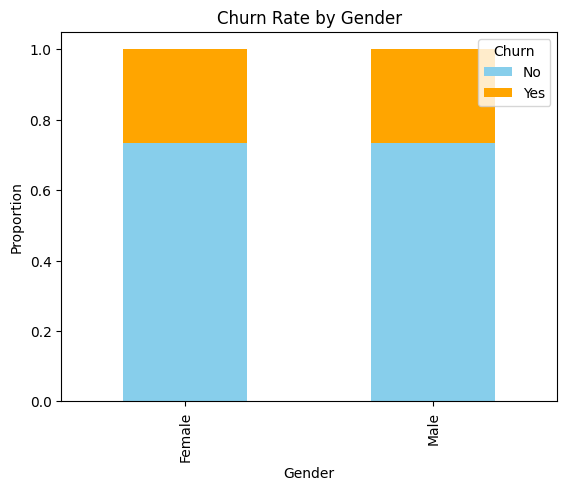

In [139]:
# Gender and Churn Visualization
gender_churn = pd.crosstab(main_df['Gender'], main_df['Churn'], normalize='index')
gender_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()

From this visualization, we can conclude that gender does not significantly impact the churn rate. Both female and male customers have comparable churn rates, indicating that gender is not a strong predictor of whether a customer will churn in this dataset.

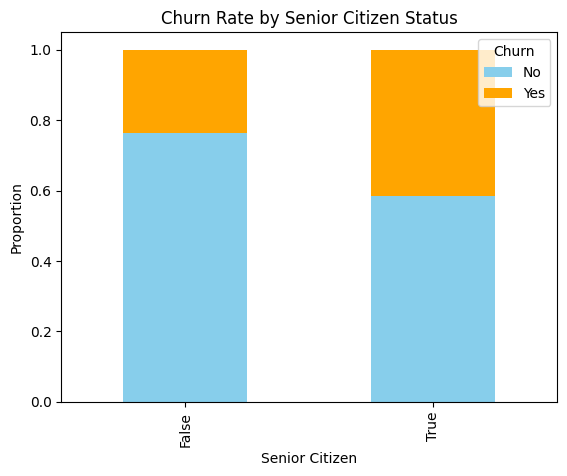

In [140]:
# Senior Citizen and Churn Visualization
senior_churn = pd.crosstab(main_df['Senior_Citizen'], main_df['Churn'], normalize='index')
senior_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Proportion')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn', loc='upper right')
plt.show()

From this visualization, we can conclude that senior citizen status does impact the churn rate. Senior citizens have a higher churn rate compared to non-senior citizens. This indicates that being a senior citizen is a stronger predictor of customer churn in this dataset, suggesting that senior citizens might need more targeted retention strategies to reduce churn.

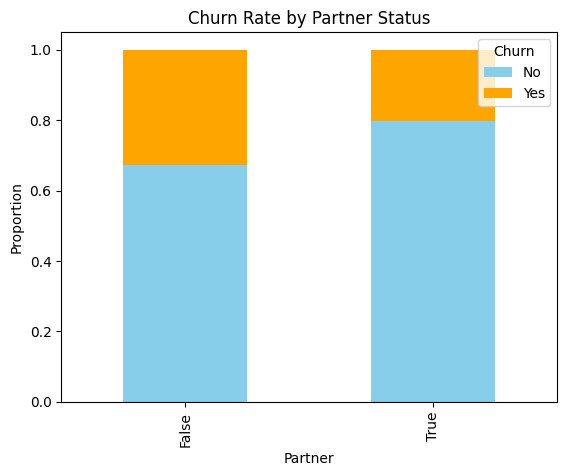

In [141]:
# Partner and Churn Visualization
partner_churn = pd.crosstab(main_df['Partner'], main_df['Churn'], normalize='index')
partner_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Partner Status')
plt.ylabel('Proportion')
plt.xlabel('Partner')
plt.legend(title='Churn', loc='upper right')
plt.show()

From this visualization, we can conclude that partner status does not significantly impact the churn rate. Customers with and without partners have comparable churn rates, suggesting that partner status is not a strong predictor of customer churn in this dataset. This implies that other factors might be more influential in determining customer churn.

##### 2. Type of Internet service and Churn

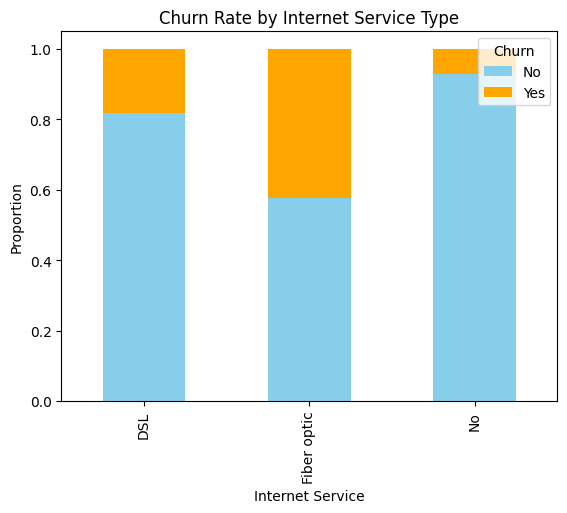

In [142]:
# Internet Service and Churn Visualization
internet_churn = pd.crosstab(main_df['Internet_Service'], main_df['Churn'], normalize='index')
internet_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Proportion')
plt.xlabel('Internet Service')
plt.legend(title='Churn', loc='upper right')
plt.show()

Overall, the chart shows that both DSL and Fiber-optic services have higher customer retention rates, with Fiber-optic having a slightly better retention rate than DSL. This information can be useful for understanding customer satisfaction and improving service strategies.

##### 3. Tenure type and Churn

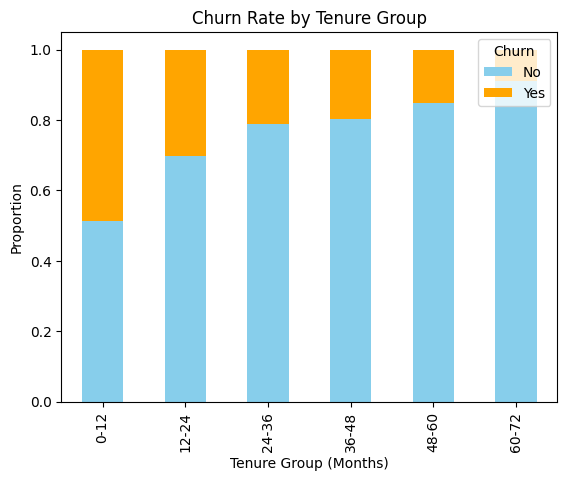

In [143]:
# Create tenure bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']
main_df['Tenure_Months'] = pd.cut(main_df['Tenure_Months'], bins=bins, labels=labels, right=False)

# Tenure and Churn Visualization
tenure_churn = pd.crosstab(main_df['Tenure_Months'], main_df['Churn'], normalize='index')
tenure_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Proportion')
plt.xlabel('Tenure Group (Months)')
plt.legend(title='Churn', loc='upper right')
plt.show()

This chart highlights the importance of customer retention strategies, especially for newer customers.As tenure increases, the proportion of customers who churn (‘Yes’) decreases, indicating that longer-tenured customers are less likely to leave.

##### 4. Contract Type and Churn

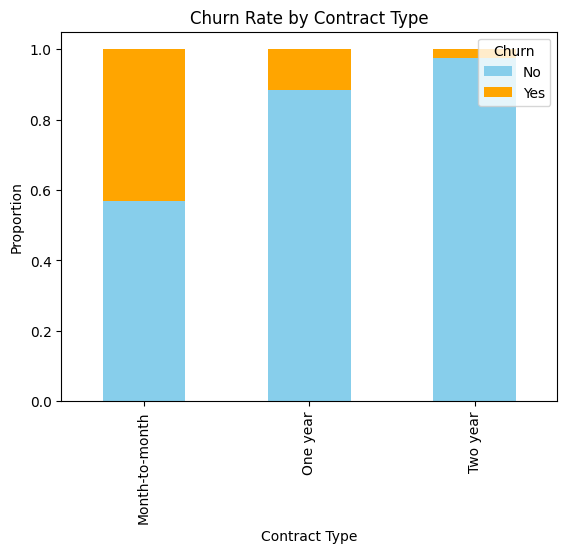

In [144]:
# Contract Type and Churn Visualization
contract_churn = pd.crosstab(main_df['Contract'], main_df['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.legend(title='Churn', loc='upper right')
plt.show()

This chart highlights the importance of longer-term contracts in reducing customer churn. The ‘Month-to-month’ contract type has a higher proportion of churn (‘Yes’) compared to ‘One year’ and ‘Two year’ contracts, indicating that customers with shorter contracts are more likely to leave.

##### 5. Payment Method and Churn

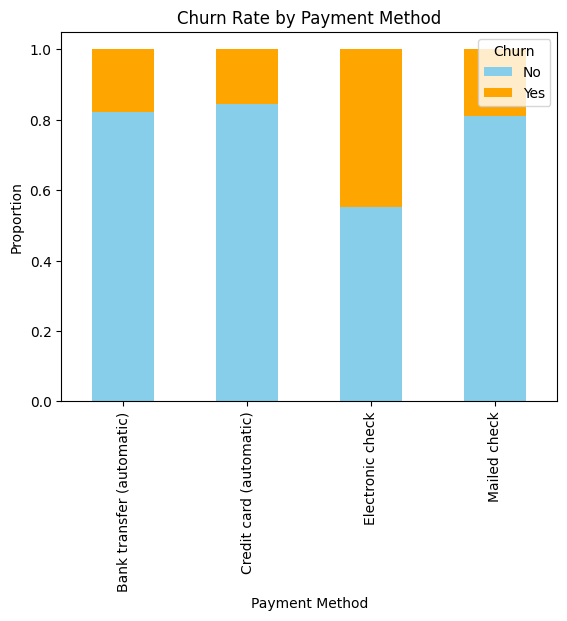

In [145]:
# Payment Method and Churn Visualization
payment_churn = pd.crosstab(main_df['Payment_Method'], main_df['Churn'], normalize='index')
payment_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.xlabel('Payment Method')
plt.legend(title='Churn', loc='upper right')
plt.show()

This chart highlights the impact of payment methods on customer retention. The ‘Electronic check’ payment method has the highest proportion of churn (‘Yes’), indicating that customers using this method are more likely to leave compared to other payment methods.

## Data Preprocessing

##### Encoding Categorical Variables: Categorical variables are encoded into numerical values to prepare for model building.

In [146]:
print(main_df.dtypes)

Customer_ID            object
Gender                 object
Senior_Citizen           bool
Partner                  bool
Dependents               bool
Tenure_Months        category
Phone_Service            bool
Multiple_Lines           bool
Internet_Service       object
Online_Security        object
Online_Backup          object
Device_Protection      object
Tech_Support           object
Streaming_TV           object
Streaming_Movies       object
Contract               object
Paperless_Billing      object
Payment_Method         object
Monthly_Charges       float64
Total_Charges         float64
Churn                  object
dtype: object


In [147]:
# Convert category column to int64
categorical_columns = ['Tenure_Months']  # Example column 'Gender' to convert

for column in categorical_columns:
    main_df[column] = main_df[column].astype('category').cat.codes.astype('int64')

# Verify the dtypes after conversion
print(main_df.dtypes)

Customer_ID           object
Gender                object
Senior_Citizen          bool
Partner                 bool
Dependents              bool
Tenure_Months          int64
Phone_Service           bool
Multiple_Lines          bool
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn                 object
dtype: object


### Data Balancing using the Random Over Sampling Method
Random Over Sampling involves randomly selecting instances from the minority class and duplicating them until the class distribution is balanced.

In [148]:
#Check the balance in the Churn column
#Percentage of customers who did not Churn

per_No = main_df['Churn'].value_counts()[0]/len(main_df['Churn'])*100

print(f'The percentage of customers who did not Churn is {per_No:.2f} %')

The percentage of customers who did not Churn is 73.46 %


In [149]:
#Check the balance in the Churn column
#Percentage of customers who Churned

per_Yes=main_df['Churn'].value_counts()[1]/len(main_df['Churn'])*100
print(f'The percentage of customers who did Churn is {per_Yes:.2f} %')

The percentage of customers who did Churn is 26.54 %


The customers who did not Churn (Majority class) are higher than those that Churned (Minority class) which shows an imbalance in the dataset.
By balancing the dataset through Random Over Sampling, you increase the number of instances in the minority class. This allows the model to learn from more examples of the minority class, potentially improving its ability to correctly classify instances

In [150]:
# Separate features (X) and target variable (y)
X = main_df.drop(columns=['Customer_ID', 'Churn'])
y = main_df['Churn']


# check if separation is successful

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5034 non-null   object 
 1   Senior_Citizen     5034 non-null   bool   
 2   Partner            5034 non-null   bool   
 3   Dependents         5034 non-null   bool   
 4   Tenure_Months      5034 non-null   int64  
 5   Phone_Service      5034 non-null   bool   
 6   Multiple_Lines     5034 non-null   bool   
 7   Internet_Service   5034 non-null   object 
 8   Online_Security    5034 non-null   object 
 9   Online_Backup      5034 non-null   object 
 10  Device_Protection  5034 non-null   object 
 11  Tech_Support       5034 non-null   object 
 12  Streaming_TV       5034 non-null   object 
 13  Streaming_Movies   5034 non-null   object 
 14  Contract           5034 non-null   object 
 15  Paperless_Billing  5034 non-null   object 
 16  Payment_Method     5034 

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5034 non-null   object 
 1   Senior_Citizen     5034 non-null   bool   
 2   Partner            5034 non-null   bool   
 3   Dependents         5034 non-null   bool   
 4   Tenure_Months      5034 non-null   int64  
 5   Phone_Service      5034 non-null   bool   
 6   Multiple_Lines     5034 non-null   bool   
 7   Internet_Service   5034 non-null   object 
 8   Online_Security    5034 non-null   object 
 9   Online_Backup      5034 non-null   object 
 10  Device_Protection  5034 non-null   object 
 11  Tech_Support       5034 non-null   object 
 12  Streaming_TV       5034 non-null   object 
 13  Streaming_Movies   5034 non-null   object 
 14  Contract           5034 non-null   object 
 15  Paperless_Billing  5034 non-null   object 
 16  Payment_Method     5034 

In [152]:
# Use RandomOverSampler to balance the data

ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Original data = X and y
# The resampled data = X_resampled and y_resampled.
# We can now use these resampled datasets and orginal data for modeling and compare if the balancing had an effect

In [153]:
# check shapes of df (original train dataset), X and y

print(main_df.shape, X.shape, y.shape)

(5034, 21) (5034, 19) (5034,)


In [154]:
# check shapes of resampled data, X_resampled and y_resampled

print(X_resampled.shape, y_resampled.shape)

# rows in the resampled data has increased to balance

(5547, 19) (5547,)


In [155]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5547 entries, 0 to 5546
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5547 non-null   object 
 1   Senior_Citizen     5547 non-null   bool   
 2   Partner            5547 non-null   bool   
 3   Dependents         5547 non-null   bool   
 4   Tenure_Months      5547 non-null   int64  
 5   Phone_Service      5547 non-null   bool   
 6   Multiple_Lines     5547 non-null   bool   
 7   Internet_Service   5547 non-null   object 
 8   Online_Security    5547 non-null   object 
 9   Online_Backup      5547 non-null   object 
 10  Device_Protection  5547 non-null   object 
 11  Tech_Support       5547 non-null   object 
 12  Streaming_TV       5547 non-null   object 
 13  Streaming_Movies   5547 non-null   object 
 14  Contract           5547 non-null   object 
 15  Paperless_Billing  5547 non-null   object 
 16  Payment_Method     5547 

### Data Splitting 
Splitting Data: The dataset is split into training and testing sets, with 80% used for training and 20% for testing.

In [156]:
# pick out boolean columns and save it as bool_cols

bool_cols = list(X_resampled.select_dtypes('bool'))
bool_cols

['Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines']

In [157]:
# convert bool_cols to integers

for col in bool_cols:
    X_resampled[col]=X_resampled[col].astype(int)

In [158]:
num_cols = list(X_resampled.select_dtypes('number'))
cat_cols = list(X_resampled.select_dtypes(exclude='number'))
print(f"The '{len(num_cols)}' numeric columns are: {num_cols}")
print(f"The '{len(cat_cols)}' categorical columns are: {cat_cols}")

The '8' numeric columns are: ['Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Monthly_Charges', 'Total_Charges']
The '11' categorical columns are: ['Gender', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']


<Figure size 1600x1200 with 0 Axes>

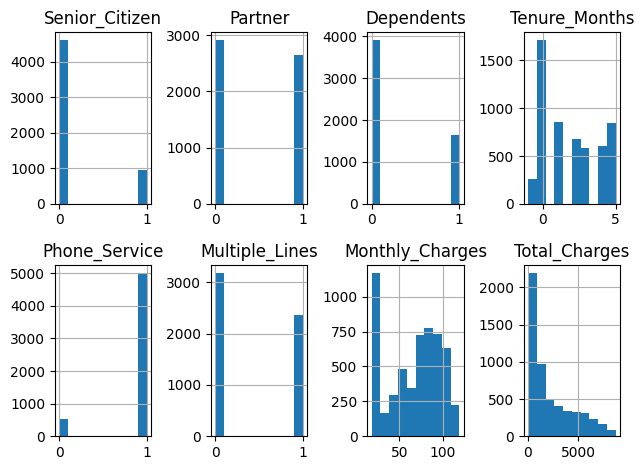

In [159]:
# check the distribution of various columns

plt.figure(figsize=(16, 12))  # Adjust the figure size as needed
X_resampled.hist(layout=(2, 4)) 

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<Axes: >

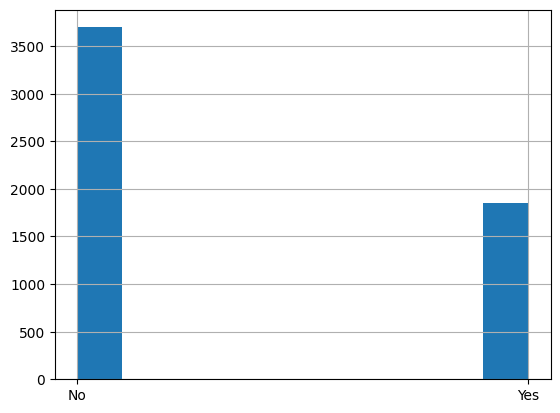

In [160]:
y_resampled.hist()

 We then conduct a stratified Train-Test Split to ensure the split maintains the same class proportions as the original dataset, which is important for classification tasks. 
 
 Then we conduct an imputation of Missing Values to handle missing data by replacing them with the median for numerical columns and the most frequent value for categorical columns.


In [161]:
# Use train_test_split with a random_state, and add stratify for Classification
stratify = y_resampled if y.dtype == "O" else None
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1, stratify = stratify )  
# Create a SimpleImputer instance with a specific strategy
imputer = SimpleImputer(strategy='median')  
num_imputer = SimpleImputer(strategy="median").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])
num_imputer.transform(X_train[num_cols]) 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92500e+01, 1.23765e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        8.46000e+01, 3.60100e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        9.69000e+01, 4.47345e+03],
       ...,
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.25000e+01, 9.34100e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        8.66500e+01, 6.22480e+03],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        8.44500e+01, 5.89985e+03]])

From this part, Numerical columns are imputed with the median and Categorical columns are imputed with the most frequent value.
The transformed (imputed) numerical and categorical columns are converted back to DataFrames with their original column names. The imputed numerical and categorical columns are concatenated to form complete datasets for both training and evaluation.

In [162]:
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[num_cols]), columns=num_cols)
X_eval_num_imputed = pd.DataFrame(num_imputer.transform(X_eval[num_cols]), columns=num_cols)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[cat_cols]), columns=cat_cols)
X_eval_cat_imputed = pd.DataFrame(cat_imputer.transform(X_eval[cat_cols]), columns=cat_cols)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_eval_imputed = pd.concat([X_eval_num_imputed, X_eval_cat_imputed], axis=1)

In [163]:
X_train_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             4437 non-null   object
 1   Internet_Service   4437 non-null   object
 2   Online_Security    4437 non-null   object
 3   Online_Backup      4437 non-null   object
 4   Device_Protection  4437 non-null   object
 5   Tech_Support       4437 non-null   object
 6   Streaming_TV       4437 non-null   object
 7   Streaming_Movies   4437 non-null   object
 8   Contract           4437 non-null   object
 9   Paperless_Billing  4437 non-null   object
 10  Payment_Method     4437 non-null   object
dtypes: object(11)
memory usage: 381.4+ KB


In [164]:
X_eval_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1110 non-null   object
 1   Internet_Service   1110 non-null   object
 2   Online_Security    1110 non-null   object
 3   Online_Backup      1110 non-null   object
 4   Device_Protection  1110 non-null   object
 5   Tech_Support       1110 non-null   object
 6   Streaming_TV       1110 non-null   object
 7   Streaming_Movies   1110 non-null   object
 8   Contract           1110 non-null   object
 9   Paperless_Billing  1110 non-null   object
 10  Payment_Method     1110 non-null   object
dtypes: object(11)
memory usage: 95.5+ KB


### Features Encoding

The code snippet provided sets up a OneHotEncoder to handle categorical data in a machine learning pipeline. It ensures that categorical data is properly formatted (as strings) before fitting the encoder. After fitting, the encoder object (encoder) is ready to transform categorical features into a numerical format suitable for machine learning algorithms.

This process is essential when working with categorical data because machine learning models typically require numerical input. One-hot encoding is a widely used technique to convert categorical variables into a format that can be interpreted by these models, allowing them to effectively learn from categorical data.

In [165]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder()
# convert X_train and X_eval to string/object datatype to enable encoding
# encoding was encountering errors because of different dtypes

X_train_cat_imputed = X_train_cat_imputed.astype(str)
X_eval_cat_imputed = X_eval_cat_imputed.astype(str)
encoder = OneHotEncoder(sparse_output=False, drop="first").fit(X_train_cat_imputed)
encoder

OneHotEncoder(drop='first', sparse_output=False)

In [166]:
# convert X_train and X_eval to string/object datatype to enable encoding

X_eval_cat_imputed = X_eval_cat_imputed.astype(str)
encoder = OneHotEncoder(sparse_output=False, drop="first").fit(X_eval_cat_imputed)
cat_encoded_cols = encoder.get_feature_names_out().tolist()
# convert to dataframe and transform imputed X_train and X_eval 

X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed), columns=cat_encoded_cols)
X_eval_cat_encoded = pd.DataFrame(encoder.transform(X_eval_cat_imputed), columns=cat_encoded_cols)
# preview X_train

X_train_cat_encoded.head()

,Gender_Male,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No,Online_Security_No Internet,Online_Security_True,Online_Security_Yes,Online_Backup_No Internet,Online_Backup_No internet service,Online_Backup_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


After ensuring the categorical data is in the correct format (str), the encoder is fitted to learn the categories from the evaluation dataset (X_eval_cat_imputed). Then, it transforms both the training and evaluation datasets (X_train_cat_imputed and X_eval_cat_imputed) into encoded numerical representations. The resulting X_train_cat_encoded and X_eval_cat_encoded DataFrames contain the encoded features, ready to be used in model training and evaluation processes.

### Features Scaling

The provided code snippet demonstrates the process of scaling numerical variables using a StandardScaler in Python. After fitting the scaler to the training data (X_train_num_imputed), it transforms both the training and evaluation datasets (X_train_num_imputed and X_eval_num_imputed) into standardized representations.

Standardization is important because it ensures that numerical data across different features are on the same scale, preventing features with larger ranges from dominating the model training process. The resulting X_train_num_scaled and X_eval_num_scaled DataFrames contain the standardized features, ready to be used as input in machine learning models.

In [167]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Scale train and evaluation datasets
# preview scaled X_train

scaler = StandardScaler().fit(X_train_num_imputed)
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=num_cols)
X_eval_num_scaled = pd.DataFrame(scaler.transform(X_eval_num_imputed), columns=num_cols)
X_train_num_scaled.head()

,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Monthly_Charges,Total_Charges
0,-0.451380,1.048741,-0.646899,1.604209,0.332205,-0.869789,-1.584991,-0.451976
1,2.215428,-0.953524,-0.646899,-0.978287,0.332205,1.149705,0.613980,-0.841858
2,-0.451380,1.048741,-0.646899,1.087710,0.332205,1.149705,1.027864,0.985639
3,-0.451380,-0.953524,-0.646899,0.571211,-3.010187,-0.869789,-0.397177,-0.008336
4,2.215428,-0.953524,-0.646899,1.604209,0.332205,1.149705,0.474336,1.319251


In [168]:
# combine scaled and encoded datasets into X_train and X_eval ready dataset
# preview dataset

X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_eval_ready = pd.concat([X_eval_num_scaled, X_eval_cat_encoded], axis=1)

X_train_ready.head()

,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Monthly_Charges,Total_Charges,Gender_Male,Internet_Service_Fiber optic,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,-0.451380,1.048741,-0.646899,1.604209,0.332205,-0.869789,-1.584991,-0.451976,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.215428,-0.953524,-0.646899,-0.978287,0.332205,1.149705,0.613980,-0.841858,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.451380,1.048741,-0.646899,1.087710,0.332205,1.149705,1.027864,0.985639,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.451380,-0.953524,-0.646899,0.571211,-3.010187,-0.869789,-0.397177,-0.008336,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2.215428,-0.953524,-0.646899,1.604209,0.332205,1.149705,0.474336,1.319251,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [169]:
X_train_ready['Tenure_Months'].unique()

array([ 1.60420913, -0.97828703,  1.0877099 ,  0.57121067, -0.4617878 ,
       -1.49478626,  0.05471144])

In [170]:
# preview X_eval dataset

X_eval_ready.head()

,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Monthly_Charges,Total_Charges,Gender_Male,Internet_Service_Fiber optic,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,-0.451380,1.048741,-0.646899,-0.978287,0.332205,1.149705,0.555094,-0.797362,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.451380,1.048741,-0.646899,1.604209,0.332205,1.149705,-0.023671,0.918729,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.215428,-0.953524,-0.646899,-0.978287,0.332205,1.149705,0.339739,-0.967879,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.451380,1.048741,1.545836,1.604209,0.332205,1.149705,1.335754,2.354300,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.451380,-0.953524,-0.646899,-0.978287,0.332205,-0.869789,0.943741,-0.829817,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


The code snippet provided demonstrates the final step of preparing data (X_train_ready and X_eval_ready) for machine learning modeling. By combining standardized numerical features (X_train_num_scaled and X_eval_num_scaled) with encoded categorical features (X_train_cat_encoded and X_eval_cat_encoded), the resulting datasets (X_train_ready and X_eval_ready) are ready to be used as input in various machine learning algorithms.

This process ensures that all features are properly transformed and aligned, meeting the requirements of many machine learning models that expect standardized numerical inputs and encoded categorical variables.

### Model Building 
This takes a machine learning model, training data, and evaluation data as input, fits the model on the training data, and then evaluates its performance on the evaluation data. It's designed to be reusable for different types of machine learning models by passing different models (model) to it.
This approach promotes code reusability and simplifies the process of comparing the performance of multiple models on the same dataset.

In [171]:
# Create a function for machine learning model
# the model indicates the name of model, trains that model and prints out an accuracy score, 
# classification report, and confusion matrix.

def model_bulding(model,X_train_ready,X_eval_ready,y_train,y_eval):
    print(f'Name of the model: {model}')
    model.fit(X_train_ready,y_train)
    y_pred=model.predict(X_eval_ready)
    score=accuracy_score(y_eval,y_pred)
    print(f'\nThe Accuracy_score is {score*100:.2f}')
    print(f'\n{classification_report(y_eval,y_pred)}')
    print(f'\n{confusion_matrix(y_eval,y_pred)}')
    print('__'*20)

Selected models

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier

In [172]:
# Create all model into the dictionary format
models={
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'random':RandomForestClassifier(),
    'adaboost':AdaBoostClassifier(),
    'gb_model':GradientBoostingClassifier()
    
}

In [173]:
# Iterate through each model and visualize the classification and confusion reports

for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_bulding(model,X_train_ready,X_eval_ready,y_train,y_eval)

Name of the model: LogisticRegression()

The Accuracy_score is 77.12

              precision    recall  f1-score   support

          No       0.82      0.84      0.83       740
         Yes       0.66      0.63      0.65       370

    accuracy                           0.77      1110
   macro avg       0.74      0.74      0.74      1110
weighted avg       0.77      0.77      0.77      1110


[[622 118]
 [136 234]]
________________________________________
Name of the model: DecisionTreeClassifier()

The Accuracy_score is 76.67

              precision    recall  f1-score   support

          No       0.86      0.78      0.82       740
         Yes       0.63      0.74      0.68       370

    accuracy                           0.77      1110
   macro avg       0.74      0.76      0.75      1110
weighted avg       0.78      0.77      0.77      1110


[[579 161]
 [ 98 272]]
________________________________________
Name of the model: RandomForestClassifier()

The Accuracy_score is 83.15

From the results above the RandomForest classifier had the highest accuracy score of 83.06%

## Cross Validation

Instead of a single train-validation-test split, we do a cross-validation, which involves repeatedly splitting the training data into different subsets (folds). This way, we can perform multiple rounds of training and evaluation to get more reliable performance estimates.

The model_cv_scores function helps in evaluating and comparing the performance of different machine learning models using cross-validation. By training and validating the model multiple times, cross-validation provides a more reliable estimate of the model's performance, helping to avoid overfitting and ensuring that the model generalizes well to unseen data. The function prints both the individual cross-validation scores and the mean accuracy, making it easy to compare the performance of different models.

In [174]:
# This code defines a function model_cv_scores to perform cross-validation on a given machine learning model.
# Create a function for cross-validation which takes in model, train dataset, and target variable
# Train the model five times using a cv of 5
# Print out the name of the model
# Print out the mean accuracy for comparison

def model_cv_scores(model,X_train_ready,y_train):
    print(f'Name of the model: {model}')
    cv_scores = cross_val_score(model, X_train_ready, y_train, cv=5, scoring='accuracy')
    print(f"\n Cross-Validation Scores are {cv_scores}")
    print(f"\n Mean Accuracy is {cv_scores.mean()*100:.2f}")
    print('__'*20)

In [175]:
# Create all model into the dictionary format

models={
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'random':RandomForestClassifier(),
    'adaboost':AdaBoostClassifier(),
    'gb_model':GradientBoostingClassifier()
}

In [176]:
# Iterate through each model and print out the cross validation scores and mean accuracy 

for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_cv_scores(model,X_train_ready,y_train)

Name of the model: LogisticRegression()

 Cross-Validation Scores are [0.77702703 0.78378378 0.77790304 0.78579481 0.77677565]

 Mean Accuracy is 78.03
________________________________________
Name of the model: DecisionTreeClassifier()

 Cross-Validation Scores are [0.77927928 0.77702703 0.75310034 0.76775648 0.77452086]

 Mean Accuracy is 77.03
________________________________________
Name of the model: RandomForestClassifier()

 Cross-Validation Scores are [0.82545045 0.84459459 0.843292   0.82750846 0.80834273]

 Mean Accuracy is 82.98
________________________________________
Name of the model: AdaBoostClassifier()

 Cross-Validation Scores are [0.78040541 0.78378378 0.79368658 0.789177   0.77903044]

 Mean Accuracy is 78.52
________________________________________
Name of the model: GradientBoostingClassifier()

 Cross-Validation Scores are [0.78603604 0.80067568 0.79819617 0.80947012 0.77564825]

 Mean Accuracy is 79.40
________________________________________


From above, Random Forest Classifier had the highest mean Accuracy of 82.78 percent. Decision Tree classifier had the lowest of 77.06 percent mean accuracy.


### Fine-Tuning Models

Hyperparameter Tuning of the Random forest classifier.

In [177]:
# get parameter of random forest classifier

print(RandomForestClassifier().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


To find the best combination of hyperparameters for the RandomForestClassifier model by trying all possible combinations of the specified hyperparameters in param_grid. 
- Grid Search with cross-validation helps in systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.
- After performing grid search, you want to know which combination of hyperparameters resulted in the best performance.
- Once the best hyperparameters are known, the model trained with these hyperparameters is retrieved. This model can then be evaluated on test data, saved for later use, or deployed into production.

In [178]:
# Grid Search
# Using Scikit-Learn's GridSearchCV 
# create a dictionary of multiple combinations to test

param_grid = {
    'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 8],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

model = RandomForestClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_ready,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 10, 30]},
             scoring='accuracy')

In [179]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [180]:
best_model

RandomForestClassifier(max_features=6, n_estimators=30)

In [181]:
# Prediction (y_pred): The best model makes predictions on the evaluation dataset.
# Accuracy Calculation: The accuracy of these predictions is computed by comparing them to the true labels.
# Output Accuracy: The accuracy score is printed for review.

y_pred = best_model.predict(X_eval_ready)

accuracy = accuracy_score(y_eval,y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.8243243243243243


In [182]:
print(RandomForestClassifier().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


The RandomForestClassifier is initialized with specific parameters for controlling the number of features considered for splits (max_features), the minimum number of samples required at leaf nodes (min_samples_leaf), the minimum number of samples required to split a node (min_samples_split), the number of trees in the forest (n_estimators), and a random state for reproducibility (random_state).

In [183]:
random_b_model=RandomForestClassifier(
    max_features=4,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    random_state=1
)

random_b_model.fit(X_train_ready,y_train)

RandomForestClassifier(max_features=4, n_estimators=30, random_state=1)

In [184]:
y_pred_b_model= random_b_model.predict(X_eval_ready)
scores = cross_val_score(random_b_model, X_train_ready, y_train, cv=5, scoring='accuracy')

mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8201488974882436


### Conclusion On Models

Since Random forest performed best, we export it and requirements.

In [185]:
# Exporting the requirements
requirements = "\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m,"__version__", None))

with open("requirements.txt", "w") as file:
    file.write(requirements)

In [186]:
# Creating a dictionary of objects to export
exports = {
    "imputer":SimpleImputer,
    "encoder":OneHotEncoder,
    "scaler":StandardScaler,
    "model":RandomForestClassifier
    
}

# Exporting the dictionary with joblib
joblib.dump(exports, 'exports.pkl')

['exports.pkl']

In [187]:
# Create the directory if it does not exist
os.makedirs('exports', exist_ok=True)

# Exporting each toolkit with joblib
joblib.dump(imputer, 'exports/imputer.pkl')
joblib.dump(encoder, 'exports/encoder.pkl')
joblib.dump(scaler, 'exports/scaler.pkl')

print("Toolkits saved successfully.")

Toolkits saved successfully.


In [188]:
# Use pip to list installed packages and their versions
installed_packages = subprocess.check_output(['pip', 'freeze']).decode('utf-8')
# Write the list to a requirements.txt file
with open("requirements.txt", "w") as file:
    file.write(installed_packages)
model

RandomForestClassifier()